In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("labeled_data.csv")

In [3]:
data

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
data.shape

(24783, 7)

In [5]:
data.columns

Index(['index', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [6]:
data.isnull().sum()

index                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [7]:
data.nunique()

index                 24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [8]:
data["labels"]=data["class"].map({0:"Hate Speech",1:"Offensive Language",2:"No Hate and Offensive"})

In [9]:
print(data["labels"])

0        No Hate and Offensive
1           Offensive Language
2           Offensive Language
3           Offensive Language
4           Offensive Language
                 ...          
24778       Offensive Language
24779    No Hate and Offensive
24780       Offensive Language
24781       Offensive Language
24782    No Hate and Offensive
Name: labels, Length: 24783, dtype: object


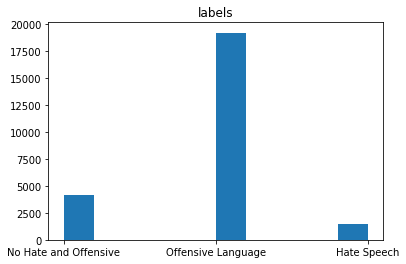

In [10]:
plt.hist(data['labels'],bins=10)
plt.title("labels")
plt.show()

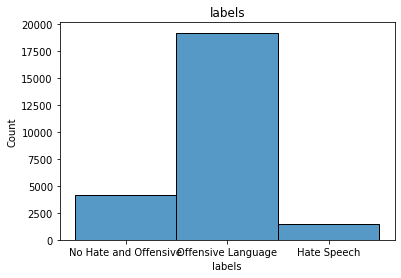

In [11]:
sns.histplot(data['labels'])
plt.title("labels")
plt.show()

In [12]:
data['hate_speech'].unique()

array([0, 1, 2, 3, 4, 6, 5, 7], dtype=int64)

In [13]:
data['hate_speech'].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

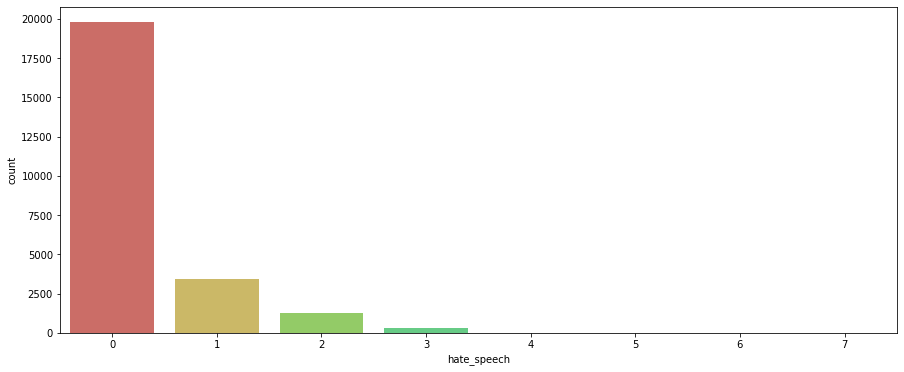

In [14]:
plt.figure(figsize=(15,6))
sns.countplot('hate_speech',data = data,palette='hls')
plt.show()

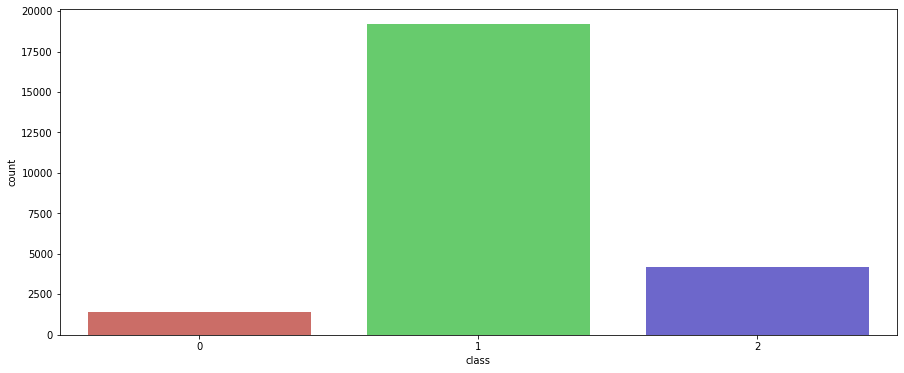

In [15]:
plt.figure(figsize=(15,6))
sns.countplot('class',data = data,palette='hls')
plt.show()

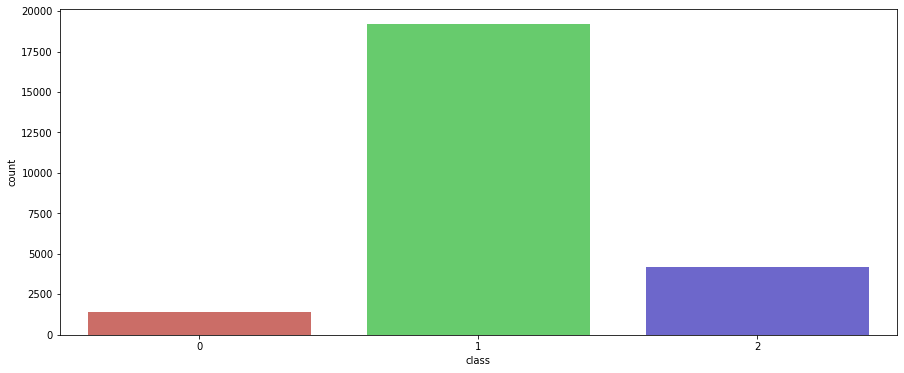

In [16]:
plt.figure(figsize=(15,6))
sns.countplot('class',data = data,palette='hls')
plt.show()

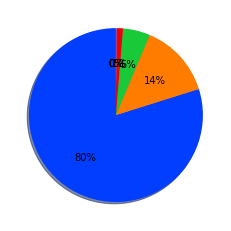

In [17]:
colors = sns.color_palette('bright')
plt.pie(data['hate_speech'].value_counts(),colors=colors,autopct='%0.0f%%',shadow = 'True',startangle=90)
plt.show()

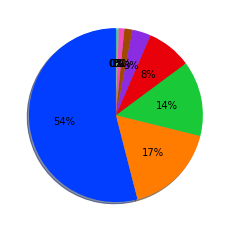

In [18]:
colors = sns.color_palette('bright')
plt.pie(data['offensive_language'].value_counts(),colors=colors,autopct='%0.0f%%',shadow = 'True',startangle=90)
plt.show()

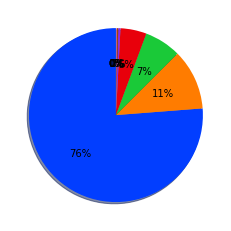

In [19]:
colors = sns.color_palette('bright')
plt.pie(data['neither'].value_counts(),colors=colors,autopct='%0.0f%%',shadow = 'True',startangle=90)
plt.show()

In [20]:
# colors = sns.color_palette('bright')
# plt.show()

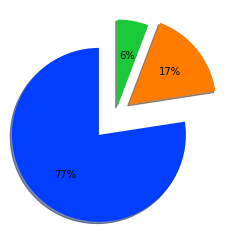

In [21]:
colors = sns.color_palette('bright')
explode = [0.3,0.2,0.1]
plt.pie(data['labels'].value_counts(),colors=colors,autopct='%0.0f%%',shadow = 'True',explode=explode,startangle=90)
plt.show()

In [22]:
data['total_length_characters']=data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters=data['total_length_characters'].sum()
print(total_length_characters)
count=0
for y in data["tweet"]:
    count=count+1
print(count)
average_length=total_length_characters/count
print(average_length)

0        140
1         85
2        120
3         62
4        137
        ... 
24778    146
24779     70
24780     67
24781     37
24782    127
Name: total_length_characters, Length: 24783, dtype: int64
2117334
24783
85.43493523786466


In [23]:
data['total_length_words']=data['tweet'].str.split().str.len()
print(data['total_length_words'])
total_length_words=data['total_length_words'].sum()
print(total_length_words)
count=0
for y in data["tweet"]:
    count=count+1
print(count)
average_words=total_length_words/count
print(average_words)

0        25
1        16
2        21
3         9
4        26
         ..
24778    19
24779    13
24780    13
24781     7
24782    18
Name: total_length_words, Length: 24783, dtype: int64
349857
24783
14.116813945042972


In [24]:
import string
import re
import nltk
import pandas as pd
import numpy as np
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["tweet"]=data["tweet"].apply(clean)
print(data["tweet"])
    

0         rt mayasolov woman shouldnt complain clean ho...
1         rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                   rt cganderson vivabas look like tranni
4         rt shenikarobert shit hear might true might f...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object


In [26]:
data['total_length_characters']=data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters=data['total_length_characters'].sum()
print(total_length_characters)
count=0
for y in data["tweet"]:
    count=count+1
print(count)
average_length=total_length_characters/count
print(average_length)

0        73
1        51
2        64
3        39
4        65
         ..
24778    68
24779    52
24780    52
24781    30
24782    80
Name: total_length_characters, Length: 24783, dtype: int64
1212187
24783
48.91203647661703


In [27]:
data['total_length_words']=data['tweet'].str.split().str.len()
print(data['total_length_words'])
total_length_words=data['total_length_words'].sum()
print(total_length_words)
count=0
for y in data["tweet"]:
    count=count+1
print(count)
average_words=total_length_words/count
print(average_words)

0        12
1        10
2        11
3         6
4        11
         ..
24778    10
24779     9
24780    10
24781     6
24782    13
Name: total_length_words, Length: 24783, dtype: int64
207521
24783
8.373522172456926


In [28]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(x)
Vectorizer.get_feature_names_out()
print(x.shape)


(24783,)


In [30]:
first_vector = X[0]
dataframe = pd.DataFrame(first_vector.T.todense(),index = Vectorizer.get_feature_names(),columns = ["Tfidf"])
dataframe.sort_values(by = ["Tfidf"],ascending = False)

,Tfidf
mayasolov,0.477458
shouldnt,0.351927
complain,0.333852
clean,0.329126
woman,0.297380
...,...
goe,0.000000
godzilla,0.000000
godthat,0.000000
godsmackmus,0.000000


In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters = 1)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [33]:
wcss

[24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124,
 24511.494684505124]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print("training Acc:",clf.score(X_train,y_train))
print("testing Acc:",clf.score(X_test,y_test))

training Acc: 0.9996386412912551
testing Acc: 0.8745567917838366


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[ 105   44  316]
 [  38 1133  208]
 [ 196  224 5915]]


In [40]:
text1 = "hii"
data = Vectorizer.transform([text1]).toarray()
print(clf.predict(data))

['No Hate and Offensive']
